In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings 

(array([ 14.,  57., 133., 335., 394., 317., 151.,  54.,   3.,   2.]),
 array([-3.21230344, -2.48914221, -1.76598098, -1.04281975, -0.31965852,
         0.40350271,  1.12666395,  1.84982518,  2.57298641,  3.29614764,
         4.01930887]),
 <BarContainer object of 10 artists>)

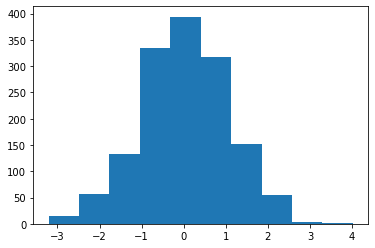

In [57]:
data = np.load('proyecto_training_data.npy')
#distribucion normal de la longitud del dataset para luego dividrlo y tomar el 80% para entrenamiento
distri = np.random.randn(len(data))

plt.hist(distri)

In [58]:
#obtenemos para el 80% para entrenar

check = (distri<0.80)
training = np.nan_to_num(data[check])   #80% de la data
testing   = np.nan_to_num(data[~check])  #80% de la data


In [59]:
len(training),len(testing)

(1127, 333)

In [60]:
columna = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
#el de entramiento
dt = pd.DataFrame(training,columns=columna)
# el del test con 20%
dtTestin = pd.DataFrame(testing,columns=columna)

In [61]:
def calcula_estadisitica(arr,columna):
    print("  Media:", np.mean(arr[columna]))
    print("  Maximo: ", np.max(arr[columna]))
    print("  Minimo: ", np.min(arr[columna]))
    print("  Rango: ", np.ptp(arr[columna],axis=0))
    print("  Std   : ", np.std(arr[columna]))

In [62]:
def grafica_distplot(filas,columnas,dato):
    fila = 0
    columna = 0
    a, axes = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        sns.distplot(dato[i],ax=axes[fila,columna])
        columna += 1

In [63]:
def grafica_correlacion(filas, columnas,dato,correla):
    fila = 0
    columna = 0
    fig, axs = plt.subplots(filas, columnas, figsize=(17, 10))
    for i in dato.columns:
        if columna == (columnas):
            fila += 1
            columna = 0
        axs[fila,columna].scatter(dato[i],dato['SalePrice'])
        axs[fila,columna].set_title(i +' coeficiente: '+ str(round(correla[i][0],4)))
        columna += 1

In [64]:
for i in dt.columns:
    print("Datos estadisitos de: ",i)
    print(calcula_estadisitica(dt,i))

Datos estadisitos de:  SalePrice
  Media: 180907.15439219165
  Maximo:  755000.0
  Minimo:  34900.0
  Rango:  720100.0
  Std   :  80439.10511790648
None
Datos estadisitos de:  OverallQual
  Media: 6.081632653061225
  Maximo:  10.0
  Minimo:  1.0
  Rango:  9.0
  Std   :  1.4004973751802405
None
Datos estadisitos de:  1stFlrSF
  Media: 1161.6069210292812
  Maximo:  4692.0
  Minimo:  334.0
  Rango:  4358.0
  Std   :  385.93360783855877
None
Datos estadisitos de:  TotRmsAbvGrd
  Media: 6.532386867790595
  Maximo:  14.0
  Minimo:  2.0
  Rango:  12.0
  Std   :  1.6163999454914997
None
Datos estadisitos de:  YearBuilt
  Media: 1970.7817213842059
  Maximo:  2009.0
  Minimo:  1872.0
  Rango:  137.0
  Std   :  30.312221838356542
None
Datos estadisitos de:  LotFrontage
  Media: 57.63886424134871
  Maximo:  313.0
  Minimo:  0.0
  Rango:  313.0
  Std   :  35.12977610590926
None


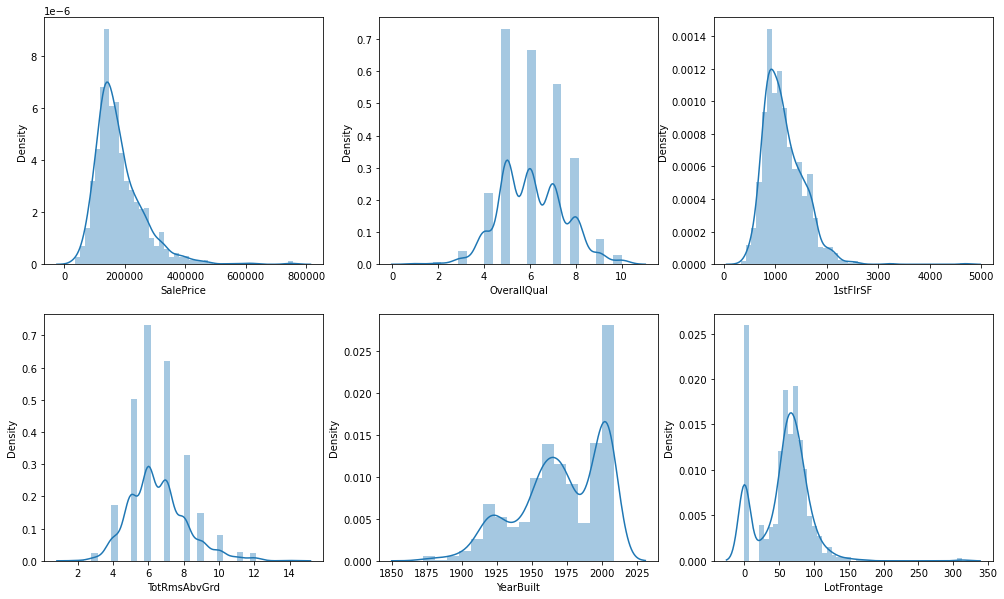

In [90]:
warnings.filterwarnings('ignore')  #para omitir el aviso que me da que
# pronto la función de distplot pueda ser que no este dispobible en otra version del seaborn
# gráficamos histrograma 
grafica_distplot(2,3,dt)

In [66]:
# matriz de correlacion entre las variables.
correlacion = dt.corr()

In [67]:
correlacion

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.794904,0.600885,0.540659,0.521709,0.212458
OverallQual,0.794904,1.000000,0.472020,0.427248,0.566284,0.170778
1stFlrSF,0.600885,0.472020,1.000000,0.408885,0.282725,0.252820
TotRmsAbvGrd,0.540659,0.427248,0.408885,1.000000,0.086056,0.226418
YearBuilt,0.521709,0.566284,0.282725,0.086056,1.000000,0.033167
LotFrontage,0.212458,0.170778,0.252820,0.226418,0.033167,1.000000


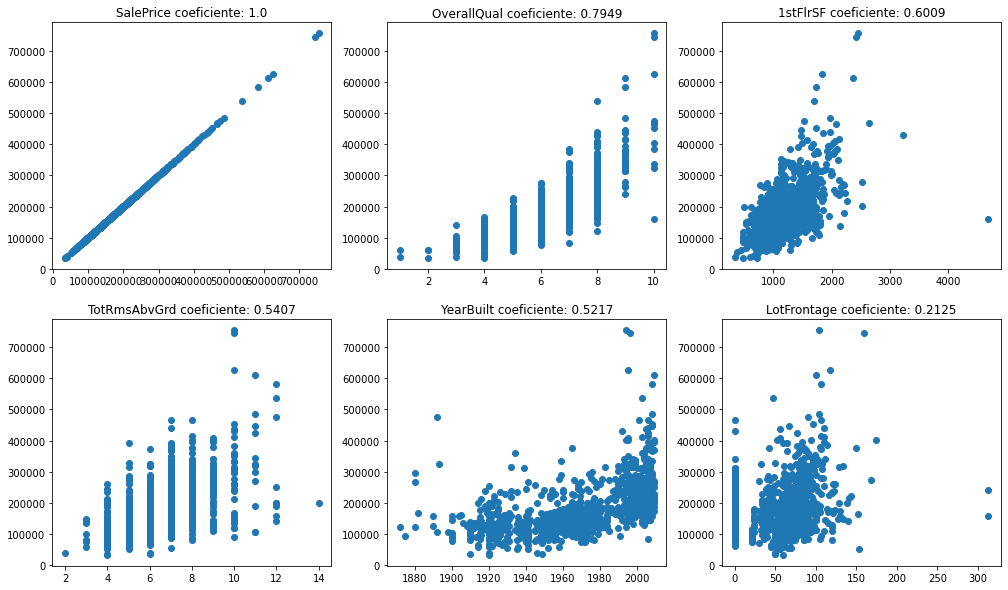

In [69]:
#Gráfiamos correlación
grafica_correlacion(2,3,dt,correlacion)

### observamos las que tienen más correlación con SaelePrice es:
### OverallQual  y 1stFlrSF

In [70]:
def calculo_error(y_pred, y_actual):
   return np.average((np.power(y_pred-y_actual,2)/2))

In [71]:
def entrenar_modelo(x,y,epochs,error_cada,lr=0.00001):
    #creamos matriz con x y con la otra columna de uno
    array_x  = np.column_stack((x,np.ones_like(y)))
    mb= np.array([0,0])   #cambiar a otro valor inicial      
    modelo = {}
    error = [] #np.zeros(epochs)
    contador = 1
    for i in range(epochs):
        modelo[i] = mb
        #product punto operación vectorizada
        yhat = np.matmul(array_x,mb)
        #error 
        #error[i]  = np.average((np.power(yhat-y,2)/2))
        #error.append(np.average((np.power(yhat-y,2)/2)))
        error.append(calculo_error(yhat, y))
        #Mostrams el error en cada iteración
        if contador == error_cada:
            print(i+1,": Error: ", error[i])
            contador = 0
        contador+=1
        diferencia = yhat - y 
        gradiantes = np.matmul(diferencia,array_x) / diferencia.shape[0]
        #print(array_x)
        mb = [mb[0]-lr*gradiantes[0], mb[1]-lr*gradiantes[1]]
    return modelo,error

In [72]:
def grafica_error(modelo,error):
    xx = np.linspace(1,len(error),len(error))
    yy = error    
    plt.plot(xx,yy,linestyle = 'dashed')
    plt.xlabel('Iteracion')
    plt.ylabel('Error')
    plt.title('Grafica de error')
    plt.show()


In [73]:
def grafica_modelo_train(modelo,x,y,n):
    #iteraciones = n/3
    
    for i in range(len(modelo)):
        if i % n == 0:   
            #print('here: ',i)
            y_predict= modelo[i][0]*x + modelo[i][1]    
            y_predict = y_predict.tolist()
            x_list = x.tolist() 
            y_actual = y.tolist()
            datos = pd.DataFrame(
                    {
                        "x":x_list,
                        "y_actual":y_actual,
                        "y_prediccion":y_predict
                    }
                )
            %matplotlib inline
            plt.plot(datos["x"], datos["y_actual"], "ro")
            plt.plot(datos["x"], datos["y_prediccion"])
            plt.title("Valor Actual vs Predicción en el tiempo "+str(i))
            plt.show()
    return datos

### modelo para OverallQual

10 : Error:  1442580320.508078
20 : Error:  1431299870.1298702
30 : Error:  1422022937.8595963
40 : Error:  1413104160.0001643
50 : Error:  1404529661.1717088
60 : Error:  1396286151.6537387
70 : Error:  1388360854.7317379
80 : Error:  1380741486.8927176
90 : Error:  1373416238.786854
100 : Error:  1366373756.924033
110 : Error:  1359603126.076941
120 : Error:  1353093852.3634226
130 : Error:  1346835846.981885
140 : Error:  1340819410.5745454
150 : Error:  1335035218.1942785
160 : Error:  1329474304.8517678
170 : Error:  1324128051.620563
180 : Error:  1318988172.2785015
190 : Error:  1314046700.4647913
200 : Error:  1309295977.3328555
210 : Error:  1304728639.6797926
220 : Error:  1300337608.5340583
230 : Error:  1296116078.1836858
240 : Error:  1292057505.6280274
250 : Error:  1288155600.4366815
260 : Error:  1284404314.999878
270 : Error:  1280797835.155215
280 : Error:  1277330571.1762187
290 : Error:  1273997149.1087606
300 : Error:  1270792402.4418993
310 : Error:  1267711364.10

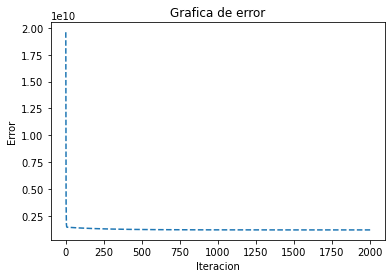

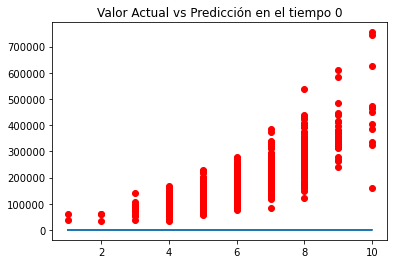

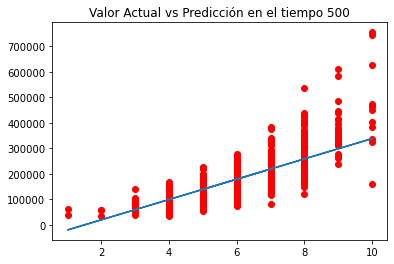

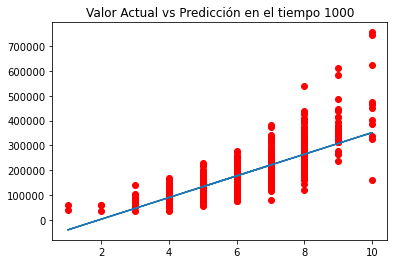

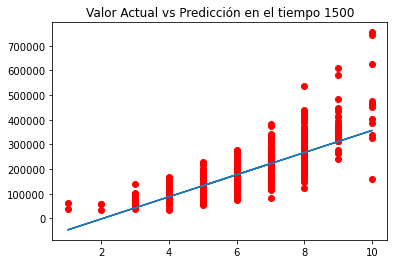

,x,y_actual,y_prediccion
0,7.0,208500.0,222336.330477
1,6.0,181500.0,177507.995982
2,7.0,223500.0,222336.330477
3,7.0,140000.0,222336.330477
4,8.0,250000.0,267164.664971


In [74]:
modelo_over,error_over = entrenar_modelo(dt['OverallQual'],dt['SalePrice'], 2000,10,0.04)
grafica_error(modelo_over,error_over)
datos = grafica_modelo_train(modelo_over, dt['OverallQual'], dt['SalePrice'], 500)
datos.head()

### modelo para 1stFlrSF

10 : Error:  2129548039.2799687
20 : Error:  2129485291.0011368
30 : Error:  2129485166.918278
40 : Error:  2129485042.8914032
50 : Error:  2129484918.8647747


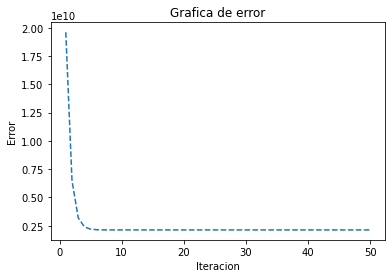

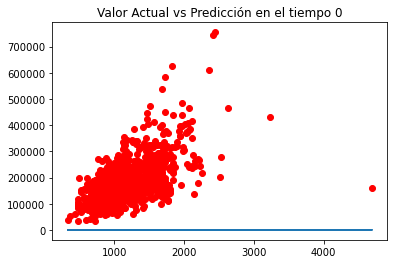

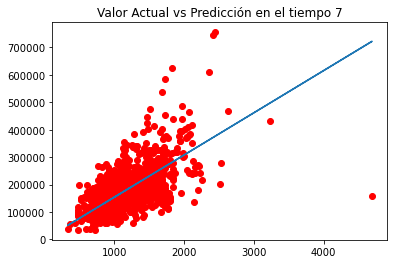

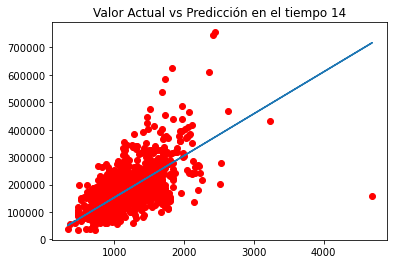

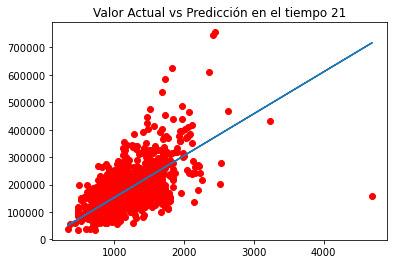

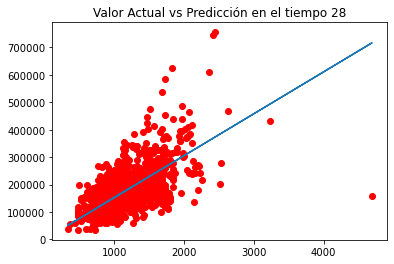

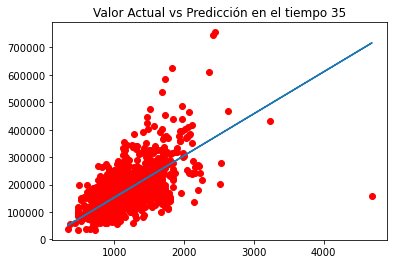

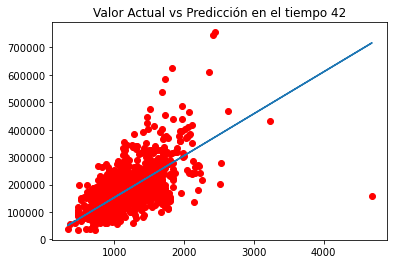

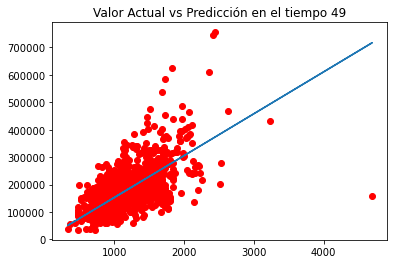

,x,y_actual,y_prediccion
0,856.0,208500.0,130717.200569
1,1262.0,181500.0,192716.108632
2,920.0,223500.0,140490.427456
3,961.0,140000.0,146751.400930
4,1145.0,250000.0,174849.428229


In [75]:
modelo_flr,error_flr = entrenar_modelo(dt['1stFlrSF'],dt['SalePrice'], 50,10,0.000001)
grafica_error(modelo_flr,error_flr)
datos_flr = grafica_modelo_train(modelo_flr, dt['1stFlrSF'], dt['SalePrice'], 7)
datos_flr.head()


### scikit-learn

In [76]:
lm1 = LinearRegression()
lm2 = LinearRegression()
OverallQual = np.array([dt['OverallQual'].tolist()])
O1stFlrSF    = np.array([dt['1stFlrSF'].tolist()])
SalePrice    = np.array(dt['SalePrice'].tolist())
modelo_OverQual_sklearn = lm1.fit(OverallQual.reshape(-1,1),SalePrice)
modelo_1stFlrSF_sklearn = lm2.fit(O1stFlrSF.reshape(-1,1),SalePrice)

In [77]:
def predicciones(modelo_normal, modelo_sklearn, x):
    y_pred_manual = modelo_normal[0]*x + modelo_normal[1]
    y_pred_sklean = modelo_sklearn.predict(x.reshape(-1,1))
    return y_pred_manual,y_pred_sklean,(y_pred_manual+y_pred_sklean)/2

In [78]:
def grafica_comparacion(y_pred_manual,y_pred_sklean,promedio,x):
    y_pre_manual_list = y_pred_manual.tolist()
    y_pred_sklean_list =y_pred_sklean.tolist()
    promedio_list     = promedio.tolist()
    x_list            = x.tolist()
    datos = pd.DataFrame(
            {
                "x":x_list,
                "y_manual":y_pre_manual_list,
                "y_sklean":y_pred_sklean_list,
                "promedio":promedio_list
            }
        )
    %matplotlib inline
    plt.plot(datos["x"], datos["y_manual"], "r", label="y_manual")
    plt.plot(datos["x"], datos["y_sklean"], "b",label="y_sklearn" )
    plt.plot(datos["x"], datos["promedio"], "g", label="promedio")
    
    plt.title("Comparación 'y' predictivas  ")
    plt.legend()
    plt.show()
    return datos

#### OverallQual con el último modelo generado vs modelos sklean testings

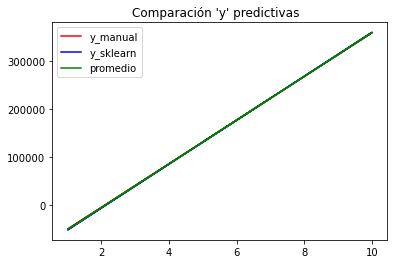

,x,y_manual,y_sklean,promedio
0,7.0,222649.066101,222836.299201,222742.682651
1,6.0,177302.905714,177180.119298,177241.512506
2,7.0,222649.066101,222836.299201,222742.682651
3,7.0,222649.066101,222836.299201,222742.682651
4,8.0,267995.226489,268492.479104,268243.852796
...,...,...,...,...
1122,7.0,222649.066101,222836.299201,222742.682651
1123,6.0,177302.905714,177180.119298,177241.512506
1124,7.0,222649.066101,222836.299201,222742.682651
1125,5.0,131956.745327,131523.939395,131740.342361


In [80]:
y_manual_o,y_sklean_o,y_promedio_o =predicciones(modelo_over[len(modelo_over.keys())-1],modelo_OverQual_sklearn,OverallQual[0])
comparacion_over = grafica_comparacion(y_manual_o,y_sklean_o,y_promedio_o,dt['OverallQual'])
comparacion_over

#### 1stFlrSF con el último modelo generado vs modelos sklean testings

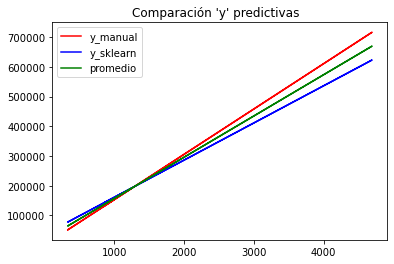

,x,y_manual,y_sklean,promedio
0,856.0,130717.200569,142632.661074,136674.930822
1,1262.0,192716.108632,193480.476414,193098.292523
2,920.0,140490.427456,150648.080241,145569.253848
3,961.0,146751.400930,155782.958145,151267.179537
4,1145.0,174849.428229,178827.288250,176838.358240
...,...,...,...,...
1122,1221.0,186455.135157,188345.598510,187400.366834
1123,953.0,145529.747569,154781.030749,150155.389159
1124,1188.0,181415.815044,184212.648002,182814.231523
1125,1078.0,164618.081332,170436.146309,167527.113821


In [81]:
y_manual_flr,y_sklean_flr,y_promedio_flr =predicciones(modelo_flr[len(modelo_flr.keys())-1],modelo_1stFlrSF_sklearn,O1stFlrSF[0])
comparacion_flr = grafica_comparacion(y_manual_flr,y_sklean_flr,y_promedio_flr,dt['1stFlrSF'])
comparacion_flr

#### calculando modelo con el datset de test de 20% con sklearn

In [84]:
lm3 = LinearRegression()
lm4 = LinearRegression()
OverallQual_test = np.array([dtTestin['OverallQual'].tolist()])
O1stFlrSF_test    = np.array([dtTestin['1stFlrSF'].tolist()])
SalePrice_test    = np.array(dtTestin['SalePrice'].tolist())
modelo_OverQual_sklearn_test = lm3.fit(OverallQual_test.reshape(-1,1),SalePrice_test)
modelo_1stFlrSF_sklearn_test = lm4.fit(O1stFlrSF_test.reshape(-1,1),SalePrice_test)

#### OverallQual calculamos 'y' predicción con datos del test del 20%

In [85]:
y_manual_test_o, y_klean_test_o,y_promedio_test_o = predicciones(modelo_over[len(modelo_over.keys())-1], modelo_OverQual_sklearn_test, OverallQual_test[0])
error_sklearn_o = calculo_error(y_klean_test_o, dtTestin['SalePrice'])
error_manual_o  = calculo_error(y_manual_test_o, dtTestin['SalePrice'])

#### 1stFlrSF calculamos 'y' predicción con datos del test del 20%

In [86]:
y_manual_test_flr, y_klean_test_flr,y_promedio_test_flr = predicciones(modelo_flr[len(modelo_flr.keys())-1], modelo_1stFlrSF_sklearn_test, O1stFlrSF_test[0])
error_sklearn_flr = calculo_error(y_klean_test_flr, dtTestin['SalePrice'])
error_manual_flr  = calculo_error(y_manual_test_flr, dtTestin['SalePrice'])

### Gráficamos errores

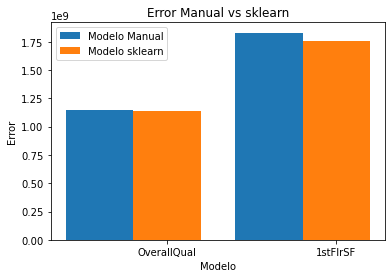

In [87]:
numero_grupo = 2
indice_barras = np.arange(2)
ancho_barras = 0.40

error_manuales = [error_manual_o,error_manual_flr]
error_sklearn = [error_sklearn_o,error_sklearn_flr]

plt.bar(indice_barras,error_manuales,width=ancho_barras,label='Modelo Manual')
plt.bar(indice_barras+ancho_barras,error_sklearn,width=ancho_barras,label='Modelo sklearn')
plt.legend(loc='best')
plt.xticks(indice_barras+ancho_barras,('OverallQual','1stFlrSF'))

plt.ylabel('Error')
plt.xlabel('Modelo')
plt.title('Error Manual vs sklearn')

plt.show()

Conlución de los dos variables elejidas en la cual tenian mayor correlación con SalePrice que fueron OverallQual y 1stFlrSF basandonos en el modelo manual que realizamos el mejor el cuando utilizamos la variable OverallQual